In [32]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dropout, Dense
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14


%run nonlinear_function.py

Reduced set: 2
Increased set: 2
Reduced data		: 2000			train		: 1600
Increased data		: 2000			train		: 6400


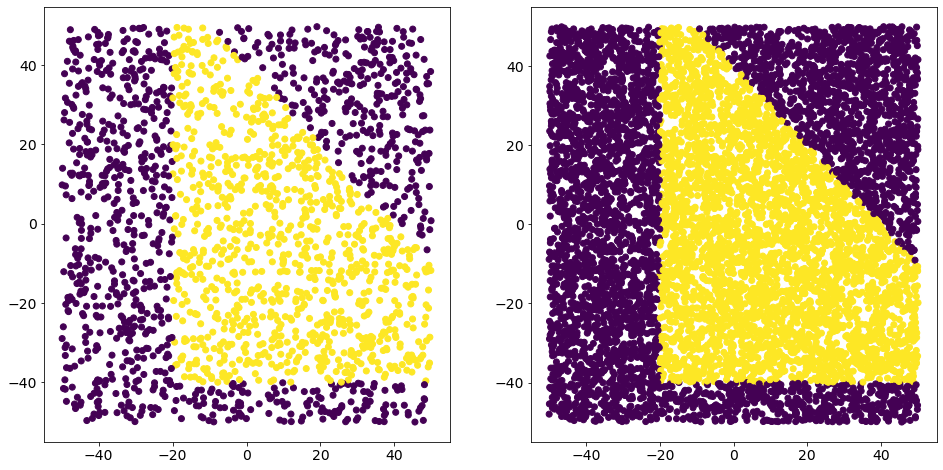

In [33]:
#training data
perc_train = 0.8

#keras works with numpy arrays: just use them from the start
TYPE = 1
x_red = np.loadtxt(filename('data_red', TYPE), delimiter=' ')
y_red = np.loadtxt(filename('labels_red', TYPE), delimiter=' ')
N_red = len(x_red)

x_inc = np.loadtxt(filename('data_inc', TYPE), delimiter=' ')
y_inc = np.loadtxt(filename('labels_inc', TYPE), delimiter=' ')
N_inc = len(x_inc)

#dim of a sample
L_red = len(x_red[0])
print('Reduced set:', L_red)

L_inc = len(x_inc[0])
print('Increased set:', L_inc)

#for i in range(10):
#    print(x_red[i], y_red[i])

N_train_red = int(perc_train * N_red)
N_train_inc = int(perc_train * N_inc)
print(f'Reduced data\t\t: {N_red}\t\t\ttrain\t\t: {N_train_red}')
print(f'Increased data\t\t: {N_red}\t\t\ttrain\t\t: {N_train_inc}')

fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
ax[0].scatter(x_red[:,0],x_red[:,1],c=y_red)
ax[1].scatter(x_inc[:,0],x_inc[:,1],c=y_inc)
plt.show()

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 4000
train: 3200


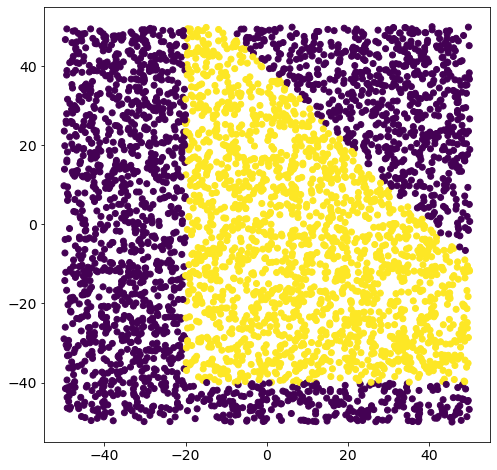

In [34]:
#keras works with numpy arrays: just use them from the start
TYPE = 1
x = np.loadtxt(filename('data', TYPE), delimiter=' ')
y = np.loadtxt(filename('labels', TYPE), delimiter=' ')
N = len(x)

#dim of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i], y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

### Split training and test data

In [35]:
(x_train, y_train) = (x[:N_train],y[:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


### Rescale input data

In [37]:
def Rescale(x):
    #return (x-x.mean()/np.sqrt(x.var()))
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [38]:
# reproducibility
np.random.seed(12345)

CASE = 1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.2)) #more stochastic
    model.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='sigmoid'))
    model.add(Dense(3, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 6         
                                                                 
 dense_13 (Dense)            (None, 20)                60        
                                                                 
 dense_14 (Dense)            (None, 20)                420       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


### optimization method and cost function

In [39]:
model.compile(loss='binary_crossentropy',
              #optimizer='RNSprop',
              optimizer='adam',
              metrics=['accuracy'])

### Training

In [40]:
fit = model.fit(x_train, y_train,
                epochs=nepoch, batch_size=50,
                validation_data=(x_valid,y_valid),
                verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.6749 - accuracy: 0.5391 - val_loss: 0.6507 - val_accuracy: 0.5750 - 1s/epoch - 17ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6447 - accuracy: 0.6363 - val_loss: 0.6118 - val_accuracy: 0.7262 - 158ms/epoch - 2ms/step
Epoch 3/400
64/64 - 0s - loss: 0.6062 - accuracy: 0.7353 - val_loss: 0.5657 - val_accuracy: 0.7563 - 239ms/epoch - 4ms/step
Epoch 4/400
64/64 - 0s - loss: 0.5603 - accuracy: 0.7691 - val_loss: 0.5219 - val_accuracy: 0.7862 - 186ms/epoch - 3ms/step
Epoch 5/400
64/64 - 0s - loss: 0.5119 - accuracy: 0.7819 - val_loss: 0.4807 - val_accuracy: 0.7975 - 172ms/epoch - 3ms/step
Epoch 6/400
64/64 - 0s - loss: 0.4633 - accuracy: 0.8006 - val_loss: 0.4393 - val_accuracy: 0.8112 - 170ms/epoch - 3ms/step
Epoch 7/400
64/64 - 0s - loss: 0.4225 - accuracy: 0.8103 - val_loss: 0.4033 - val_accuracy: 0.8338 - 166ms/epoch - 3ms/step
Epoch 8/400
64/64 - 0s - loss: 0.3917 - accuracy: 0.8356 - val_loss: 0.3805 - val_accuracy: 0.8413 - 150ms/epoch - 2ms/step
Epoch 9/40

### Splitting in training and test set

In [41]:
(x_train_red, y_train_red) = (x_red[:N_train_red],y_red[:N_train_red])
(x_valid_red, y_valid_red) = (x_red[N_train_red:],y_red[N_train_red:])
print("Train:",len(x_train_red),"\t Validation:",len(x_valid_red))

Train: 1600 	 Validation: 400


In [42]:
(x_train_inc, y_train_inc) = (x_inc[:N_train_inc],y_inc[:N_train_inc])
(x_valid_inc, y_valid_inc) = (x_inc[N_train_inc:],y_inc[N_train_inc:])
print("Train:",len(x_train_inc),"\t Validation:",len(x_valid_inc))

Train: 6400 	 Validation: 1600


### Rescale input data

In [43]:
def Rescale(x):
    return (x-x.mean()/np.sqrt(x.var()))
    #return x/50

x_train_red = Rescale(x_train_red)
x_valid_red = Rescale(x_valid_red)

x_train_inc = Rescale(x_train_inc)
x_valid_inc = Rescale(x_valid_inc)

In [44]:
# reproducibility
np.random.seed(12345)

CASE = 1

if CASE==1:
    model_red = Sequential()
    model_red.add(Dense(L_red,input_shape=(L_red,), activation='relu'))
    model_red.add(Dense(20, activation='relu'))
    model_red.add(Dense(20, activation='relu'))
    model_red.add(Dropout(0.2)) #more stochastic
    model_red.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model_red = Sequential()
    model_red.add(Dense(L_red,input_shape=(L_red,), activation='sigmoid'))
    model_red.add(Dense(3, activation='sigmoid'))
    model_red.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model_red.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 2)                 6         
                                                                 
 dense_17 (Dense)            (None, 20)                60        
                                                                 
 dense_18 (Dense)            (None, 20)                420       
                                                                 
 dropout_4 (Dropout)         (None, 20)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [45]:
# reproducibility
np.random.seed(12345)

CASE = 1

if CASE==1:
    model_inc = Sequential()
    model_inc.add(Dense(L_inc,input_shape=(L_inc,), activation='relu'))
    model_inc.add(Dense(20, activation='relu'))
    model_inc.add(Dense(20, activation='relu'))
    model_inc.add(Dropout(0.2)) #more stochastic
    model_inc.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model_inc = Sequential()
    model_inc.add(Dense(L_inc,input_shape=(L_inc,), activation='sigmoid'))
    model_inc.add(Dense(3, activation='sigmoid'))
    model_inc.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model_inc.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 2)                 6         
                                                                 
 dense_21 (Dense)            (None, 20)                60        
                                                                 
 dense_22 (Dense)            (None, 20)                420       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


### optimization method and cost function

In [46]:
model_red.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

In [47]:
model_inc.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

### Training

In [48]:
fit_red = model_red.fit(x_train_red, y_train_red,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_red,y_valid_red),
                        verbose=2)

Epoch 1/400
32/32 - 1s - loss: 0.8439 - accuracy: 0.6419 - val_loss: 0.7023 - val_accuracy: 0.6275 - 892ms/epoch - 28ms/step
Epoch 2/400
32/32 - 0s - loss: 0.6551 - accuracy: 0.6775 - val_loss: 0.5829 - val_accuracy: 0.6400 - 88ms/epoch - 3ms/step
Epoch 3/400
32/32 - 0s - loss: 0.5697 - accuracy: 0.7038 - val_loss: 0.5329 - val_accuracy: 0.6475 - 90ms/epoch - 3ms/step
Epoch 4/400
32/32 - 0s - loss: 0.5157 - accuracy: 0.7344 - val_loss: 0.4956 - val_accuracy: 0.7000 - 86ms/epoch - 3ms/step
Epoch 5/400
32/32 - 0s - loss: 0.4973 - accuracy: 0.7450 - val_loss: 0.4904 - val_accuracy: 0.7025 - 91ms/epoch - 3ms/step
Epoch 6/400
32/32 - 0s - loss: 0.4674 - accuracy: 0.7769 - val_loss: 0.4670 - val_accuracy: 0.7525 - 88ms/epoch - 3ms/step
Epoch 7/400
32/32 - 0s - loss: 0.4351 - accuracy: 0.8081 - val_loss: 0.4500 - val_accuracy: 0.7800 - 84ms/epoch - 3ms/step
Epoch 8/400
32/32 - 0s - loss: 0.4380 - accuracy: 0.7969 - val_loss: 0.4436 - val_accuracy: 0.7900 - 87ms/epoch - 3ms/step
Epoch 9/400
32

In [49]:
fit_inc = model_inc.fit(x_train_inc, y_train_inc,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_inc,y_valid_inc),
                        verbose=2)

Epoch 1/400
128/128 - 1s - loss: 2.1958 - accuracy: 0.4400 - val_loss: 0.6496 - val_accuracy: 0.6556 - 1s/epoch - 9ms/step
Epoch 2/400
128/128 - 0s - loss: 0.6665 - accuracy: 0.6519 - val_loss: 0.6267 - val_accuracy: 0.6969 - 252ms/epoch - 2ms/step
Epoch 3/400
128/128 - 0s - loss: 0.6385 - accuracy: 0.6808 - val_loss: 0.6092 - val_accuracy: 0.7188 - 253ms/epoch - 2ms/step
Epoch 4/400
128/128 - 0s - loss: 0.6218 - accuracy: 0.7008 - val_loss: 0.5826 - val_accuracy: 0.7744 - 260ms/epoch - 2ms/step
Epoch 5/400
128/128 - 0s - loss: 0.5974 - accuracy: 0.7269 - val_loss: 0.5650 - val_accuracy: 0.7694 - 267ms/epoch - 2ms/step
Epoch 6/400
128/128 - 0s - loss: 0.5808 - accuracy: 0.7336 - val_loss: 0.5418 - val_accuracy: 0.8037 - 261ms/epoch - 2ms/step
Epoch 7/400
128/128 - 0s - loss: 0.5664 - accuracy: 0.7395 - val_loss: 0.5261 - val_accuracy: 0.7962 - 272ms/epoch - 2ms/step
Epoch 8/400
128/128 - 0s - loss: 0.5508 - accuracy: 0.7511 - val_loss: 0.5123 - val_accuracy: 0.7956 - 266ms/epoch - 2ms/

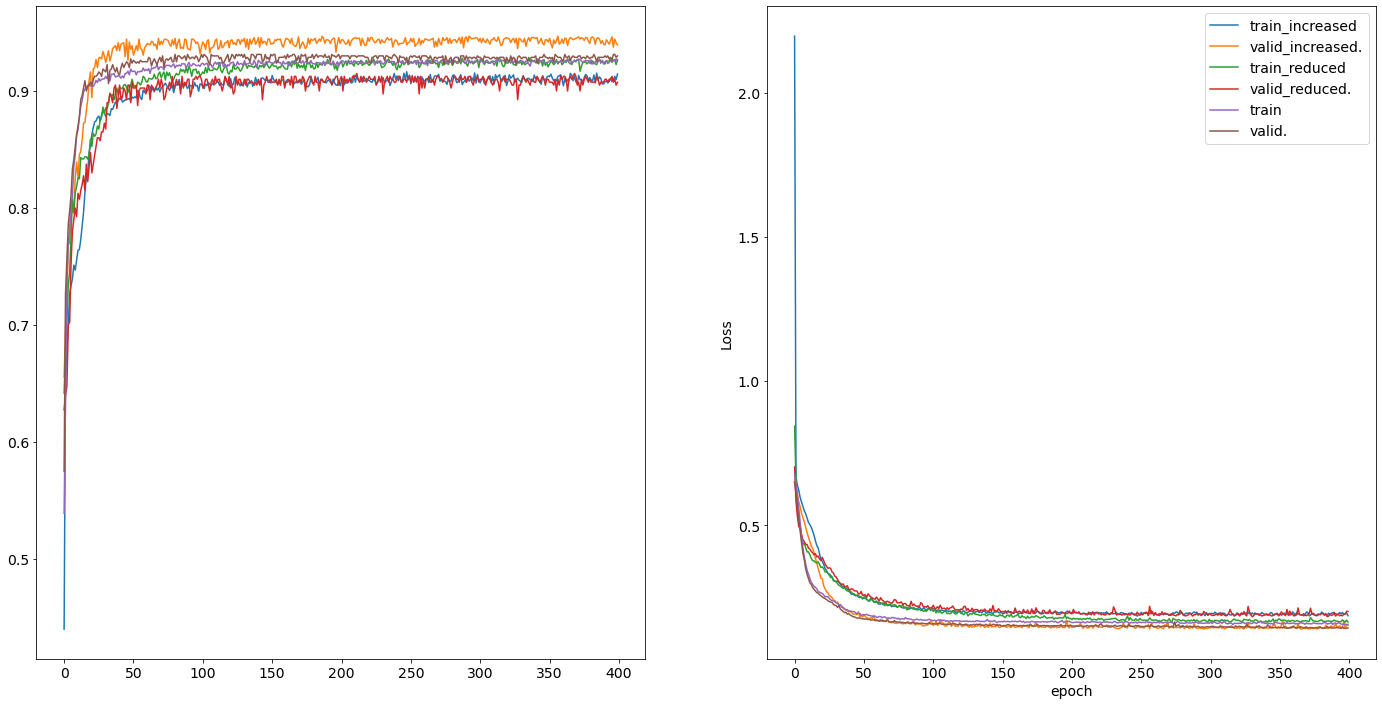

In [50]:
fig,AX=plt.subplots(1,2,figsize=(24,12))
ax=AX[0]
ax.plot(fit_inc.history['accuracy'],label="train_increased")
ax.plot(fit_inc.history['val_accuracy'],label="valid_increased.")
ax.plot(fit_red.history['accuracy'],label="train_reduced")
ax.plot(fit_red.history['val_accuracy'],label="valid_reduced.")
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")

ax=AX[1]
ax.plot(fit_inc.history['loss'],label="train_increased")
ax.plot(fit_inc.history['val_loss'],label="valid_increased.")
ax.plot(fit_red.history['loss'],label="train_reduced")
ax.plot(fit_red.history['val_loss'],label="valid_reduced.")
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [51]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model.predict(grid_r)

51 2601
[50. 50.]


(2601, 2) (2601, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

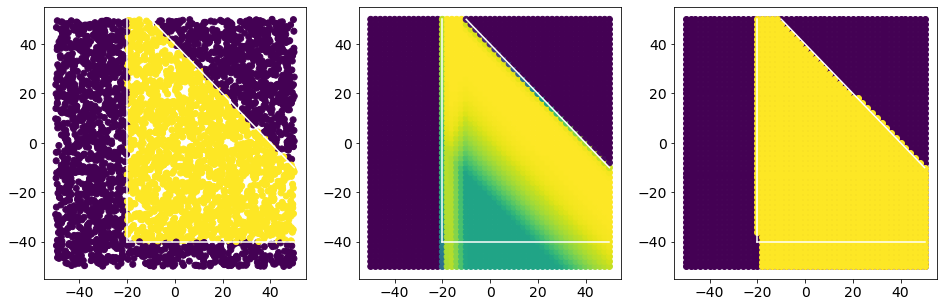

In [52]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
print(grid.shape, pred.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred[:,0])
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show